In [104]:
import pandas as pd
import re
import string
import emoji

df = pd.read_excel('laundry_reviews_dataset.xlsx')

# Preprocessing
## Drop all columns except review_text
df.dropna(subset=['review_text'], inplace=True)

df['review_text'] = df['review_text'].str.lower()
df['review_text'] = df['review_text'].astype(str)
df['review_text'] = df['review_text'].apply(lambda x: re.sub(r"\d+", "", x))
df['review_text'] = df['review_text'].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)))
df['review_text'] = df['review_text'].str.strip()
df['review_text'] = df['review_text'].apply(lambda x: re.sub('\s+', ' ', x))
df['review_text'] = df['review_text'].apply(lambda x: re.sub(r'[\u2070-\u209F\u00B2-\u00B3\u00B9-\u00BF\u02B0-\u036F\u1AB0-\u1AFF\u2090-\u2094]+', '', x))

df['review_text'] = df['review_text'].apply(lambda x: emoji.demojize(x))

df['review_text'] = df['review_text'].apply(lambda x: x.translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation))))
df['review_text'] = df['review_text'].str.strip()
df['review_text'] = df['review_text'].apply(lambda x: re.sub('\s+', ' ', x))

df['review_text'] = df['review_text'].apply(lambda x: re.sub(r'[^\u0000-\u007F\uD800-\uDBFF\uDC00-\uDFFF]+', '', x))

df['review_text'][0]

'akhirnya bisa nemu laundry yang bisa antar jemput barokalloh nuhun suka cuci'

In [105]:
# Assign label to negative and positive reviews
df['labels'] = df.review_rating.apply(lambda x: 0 if x in [1, 2, 3] else 1)
df.head()

# Check each label total reviews data
lenNegSentiment = df['labels'].value_counts()[0]
lenPosSentiment = df['labels'].value_counts()[1]
print("Count of 0 (Negative) sentiment:", lenNegSentiment)
print("Count of 1 (Positive) sentiment:", lenPosSentiment)

Count of 0 (Negative) sentiment: 1002
Count of 1 (Positive) sentiment: 1197


In [106]:
# Balancing Negative and Positive Reviews

posData = df[df['labels'] == 1]
negData = df[df['labels'] == 0]

randPosData = posData.sample(n=1000, random_state=40)
randNegData = negData.sample(n=1000, random_state=40)

randCombinedData = pd.concat([randPosData, randNegData])

df = df.loc[randCombinedData.index]
df['review_text'] = randCombinedData['review_text']

lenNegSentiment = df['labels'].value_counts()[0]
lenPosSentiment = df['labels'].value_counts()[1]
print("Count of 0 (Negative) sentiment:", lenNegSentiment)
print("Count of 1 (Positive) sentiment:", lenPosSentiment)

Count of 0 (Negative) sentiment: 1000
Count of 1 (Positive) sentiment: 1000


In [107]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers

tokenizer = Tokenizer(oov_token="<OOV>")

# Split training and testing
split = round(len(df)*0.8)
trainReviews = df['review_text'][:split]
trainLabel = df['labels'][:split]
testReviews = df['review_text'][split:]
testLabel = df['labels'][split:]

C:\Users\hendy\AppData\Local\Temp\ipykernel_14016\1299797616.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  trainReviews = df['review_text'][:split]
C:\Users\hendy\AppData\Local\Temp\ipykernel_14016\1299797616.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  trainLabel = df['labels'][:split]
C:\Users\hendy\AppData\Local\Temp\ipykernel_14016\1299797616.py:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this

In [108]:
import numpy as np
trainSentences = []
trainLabels = []
testSentences = []
testLabels = []

for row in trainReviews:
    trainSentences.append(str(row))

for row in trainLabel:
    trainLabels.append(row)
    
for row in testReviews:
    testSentences.append(str(row))
    
for row in testLabel:
    testLabels.append(row)

In [109]:
vocab_size = 5000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(trainSentences)
word_index = tokenizer.word_index

print(word_index)

{'<OOV>': 1, 'dan': 2, 'laundry': 3, 'saya': 4, 'yang': 5, 'di': 6, 'nya': 7, 'bersih': 8, 'ada': 9, 'tidak': 10, 'wangi': 11, 'bisa': 12, 'ga': 13, 'baju': 14, 'juga': 15, 'up': 16, 'ramah': 17, 'cuci': 18, 'ini': 19, 'sangat': 20, 'banget': 21, 'thumbs': 22, 'pelayanan': 23, 'lagi': 24, 'disini': 25, 'face': 26, 'jadi': 27, 'gak': 28, 'tapi': 29, 'ke': 30, 'mau': 31, 'untuk': 32, 'hari': 33, 'hasil': 34, 'with': 35, 'bagus': 36, 'pakaian': 37, 'sudah': 38, 'cucian': 39, 'dengan': 40, 'cepat': 41, 'smiling': 42, 'dari': 43, 'rapih': 44, 'antar': 45, 'jemput': 46, 'udah': 47, 'sama': 48, 'rapi': 49, 'harga': 50, 'tempat': 51, 'baik': 52, 'baru': 53, 'jam': 54, 'hilang': 55, 'aja': 56, 'ya': 57, 'sekali': 58, 'selesai': 59, 'buat': 60, 'pelayanannya': 61, 'nyuci': 62, 'selalu': 63, 'kalau': 64, 'karena': 65, 'waktu': 66, 'itu': 67, 'bgt': 68, 'masih': 69, 'hasilnya': 70, 'lama': 71, 'yg': 72, 'eyes': 73, 'lebih': 74, 'kali': 75, 'banyak': 76, 'langganan': 77, 'service': 78, 'sini': 79, 

In [110]:
trainSequences = tokenizer.texts_to_sequences(trainSentences)
trainPadded = pad_sequences(trainSequences, maxlen=max_length, truncating=trunc_type)

testSequences = tokenizer.texts_to_sequences(testSentences)
testPadded = pad_sequences(testSequences, maxlen=max_length)

In [111]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 120, 16)           80000     
                                                                 
 dropout_6 (Dropout)         (None, 120, 16)           0         
                                                                 
 global_average_pooling1d_9   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_14 (Dense)            (None, 16)                272       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                      

In [112]:
trainingLabelsArr = np.array(trainLabels)
testingLabelsArr = np.array(testLabels)

num_epochs = 100
history = model.fit(trainPadded, trainingLabelsArr, epochs=num_epochs, validation_data=(testPadded, testingLabelsArr))

Epoch 1/100
50/50 [==============================] - 2s 11ms/step - loss: 0.8131 - accuracy: 0.6306 - val_loss: 0.8766 - val_accuracy: 0.0025
Epoch 2/100
50/50 [==============================] - 0s 7ms/step - loss: 0.7561 - accuracy: 0.6306 - val_loss: 0.9185 - val_accuracy: 0.0100
Epoch 3/100
50/50 [==============================] - 0s 6ms/step - loss: 0.7143 - accuracy: 0.6356 - val_loss: 0.9543 - val_accuracy: 0.0575
Epoch 4/100
50/50 [==============================] - 0s 8ms/step - loss: 0.6857 - accuracy: 0.6456 - val_loss: 0.9648 - val_accuracy: 0.0800
Epoch 5/100
50/50 [==============================] - 0s 8ms/step - loss: 0.6624 - accuracy: 0.6625 - val_loss: 0.9458 - val_accuracy: 0.1025
Epoch 6/100
50/50 [==============================] - 0s 7ms/step - loss: 0.6444 - accuracy: 0.6800 - val_loss: 0.9185 - val_accuracy: 0.1550
Epoch 7/100
50/50 [==============================] - 0s 7ms/step - loss: 0.6225 - accuracy: 0.7075 - val_loss: 0.8660 - val_accuracy: 0.2325
Epoch 8/100


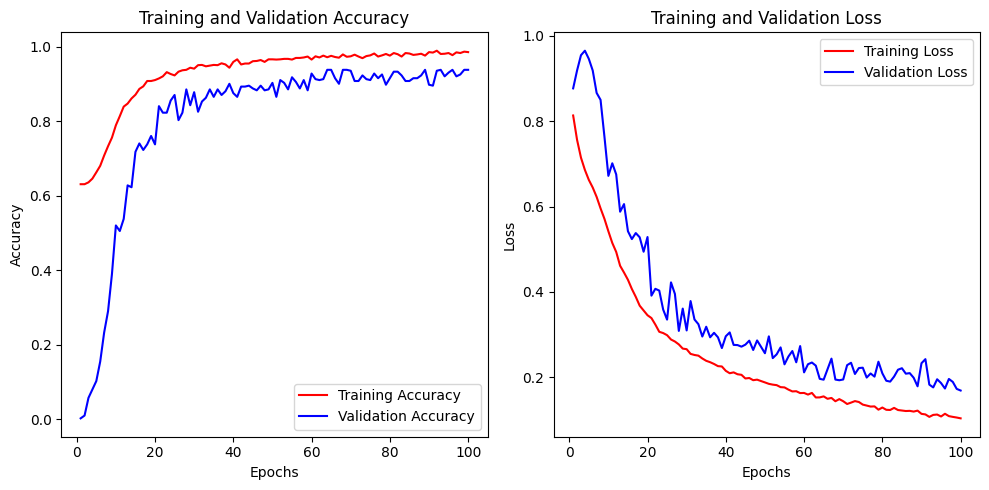

In [113]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [114]:
def preprocessText(text):
    text = text.lower()
    text = re.sub(r"\d+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = text.strip()
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'[\u2070-\u209F\u00B2-\u00B3\u00B9-\u00BF\u02B0-\u036F\u1AB0-\u1AFF\u2090-\u2094]+', '', text)
    text = emoji.demojize(text)
    text = text.translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation)))
    text = text.strip()
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'[^\u0000-\u007F\uD800-\uDBFF\uDC00-\uDFFF]+', '', text)
    return text

In [115]:
# Test predicting
input_text = "mahal banget" 

preprocessedInputText = preprocessText(input_text)

inputSequence = pad_sequences(tokenizer.texts_to_sequences([preprocessedInputText]), maxlen=max_length)
predictions = model.predict(inputSequence)
print(predictions)

predictedSentiments = ["Positive Reviews" if pred > 0.5 else "Negative Reviews" for pred in predictions]
predictedSentiments

1/1 [==============================] - 0s 136ms/step
[[0.38132617]]


['Negative Reviews']